In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

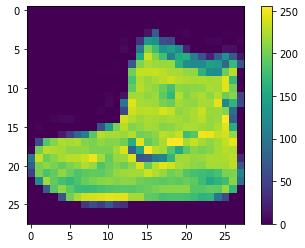

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

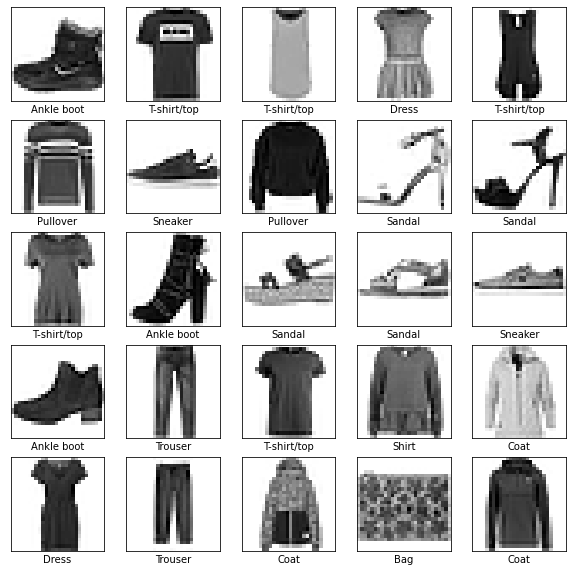

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2322 - accuracy: 0.9127
Epoch 2/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2241 - accuracy: 0.9153
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2179 - accuracy: 0.9176
Epoch 4/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2106 - accuracy: 0.9213
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2049 - accuracy: 0.9225
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1985 - accuracy: 0.9247
Epoch 7/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1930 - accuracy: 0.9272
Epoch 8/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1880 - accuracy: 0.9293
Epoch 9/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1826 - accuracy: 0.9311
Epoch 10/20
60

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.4144 - accuracy: 0.8890

Test accuracy: 0.889


In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

In [36]:
predictions[0]

array([6.1860140e-16, 1.3587375e-15, 1.6005105e-19, 7.8499738e-18,
       1.7897019e-16, 2.9704677e-06, 3.5465103e-14, 2.6480629e-04,
       8.5630813e-15, 9.9973220e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

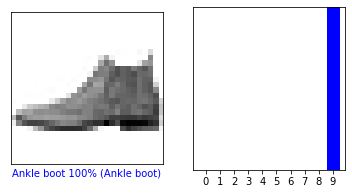

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

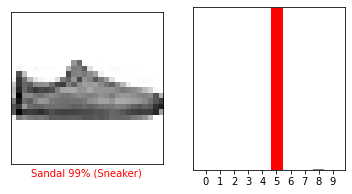

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

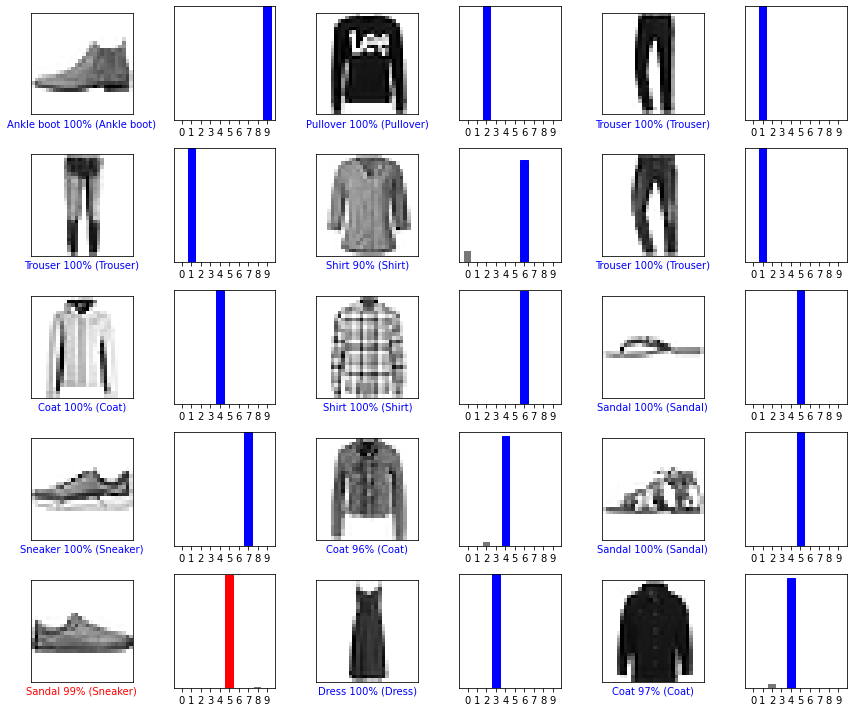

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.0707026e-05 2.7463154e-14 9.9972349e-01 4.2153971e-11 1.8287398e-04
  9.7262709e-10 5.2818807e-05 1.5766460e-18 5.1952827e-11 3.5810866e-17]]


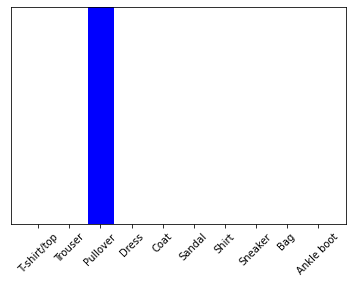

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2